# EDA

## Load related packages

In [ ]:
pip install plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 4.4 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
from statsmodels.tsa.seasonal import seasonal_decompose
from arch.unitroot import ADF

## Connect with the dataset drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/ML-Transportation-Rate"

## Create some sample data

We use the file Pricing_ML_Model-12142020_1145 am.csv as sample file

In [ ]:
sample = pd.read_csv(path + "/Raw_Data_Machine_Learning/Pricing_ML_Model-12142020_1145 am.csv")

In [ ]:
sample.head(10)

,Unnamed: 0,SHIPMENT ID,CUSTOMER,DISTANCE,CASES,WEIGHT,VOLUME,SOURCE LOCATION ID,ORIGIN NAME,ORIGIN CITY,...,FUEL COSTS,ACC. COSTS,TOTAL ACTUAL COST,PU_APPT,DL_APPT,PU_ARRIVAL (X3),PU_DEPARTED (AF),DL_ARRIVAL (X1),DL_DEPARTED (D1),Insert Date
0,0,EXEL.B20325E02206,7931282203445289709,22.4,22,184.44,518.75,-5287542357817616860,-7531948829491363746,NEWNAN,...,9.50,0.0,104.50,11/30/2020 22:11,12/4/2020 18:12,11/30/2020 17:00,11/30/2020 17:00,12/4/2020 12:00,12/4/2020 13:00,24:01.0
1,1,EXEL.B20324E02785,-8358465311509355165,257.5,1,220.00,0.00,2635282334716820198,4644084773348106065,TOLEDO,...,9.41,50.0,153.53,11/20/2020 21:11,11/21/2020 1:11,11/20/2020 19:47,11/20/2020 20:19,NO EVENT,NO EVENT,53:04.0
2,2,EXEL.B20324E02788,-8358465311509355165,437.9,1,220.00,0.00,2635282334716820198,4644084773348106065,TOLEDO,...,13.94,50.0,203.38,11/20/2020 21:11,11/21/2020 4:11,11/20/2020 19:47,11/20/2020 20:19,NO EVENT,NO EVENT,53:27.0
3,3,EXEL.B20324E02792,-8358465311509355165,75.0,9,614.97,0.00,2635282334716820198,4644084773348106065,TOLEDO,...,10.70,50.0,167.74,11/20/2020 21:11,11/20/2020 22:11,11/20/2020 19:47,11/20/2020 20:19,NO EVENT,NO EVENT,54:02.0
4,4,EXEL.B20324E02793,-8358465311509355165,110.7,1,155.00,0.00,2635282334716820198,4644084773348106065,TOLEDO,...,8.90,50.0,147.90,11/20/2020 21:11,11/20/2020 23:11,11/20/2020 19:47,11/20/2020 20:19,NO EVENT,NO EVENT,54:10.0
5,5,EXEL.B20324E02797,-8358465311509355165,285.0,9,570.00,0.00,2635282334716820198,4644084773348106065,TOLEDO,...,14.49,50.0,209.37,11/20/2020 21:11,11/21/2020 2:11,11/20/2020 19:47,11/20/2020 20:19,NO EVENT,NO EVENT,54:28.0
6,6,EXEL.B20324E02800,-8358465311509355165,130.5,1,235.00,0.00,2635282334716820198,4644084773348106065,TOLEDO,...,9.20,50.0,151.20,11/20/2020 21:11,11/20/2020 23:11,11/20/2020 19:47,11/20/2020 20:19,NO EVENT,NO EVENT,54:50.0
7,7,EXEL.B20325E00897,-8358465311509355165,53.5,16,6040.00,0.00,2635282334716820198,4644084773348106065,TOLEDO,...,10.70,75.0,485.70,11/20/2020 15:11,11/20/2020 22:11,NO EVENT,NO EVENT,NO EVENT,11/20/2020 11:07,40:24.0
8,8,EXEL.B20325E00899,-8358465311509355165,117.0,1,275.00,0.00,2635282334716820198,4644084773348106065,TOLEDO,...,9.40,50.0,153.43,11/20/2020 21:11,11/20/2020 23:11,11/20/2020 19:47,11/20/2020 20:19,NO EVENT,NO EVENT,42:11.0
9,9,EXEL.B20325E00902,-8358465311509355165,755.1,1,195.00,0.00,2635282334716820198,4644084773348106065,TOLEDO,...,16.38,50.0,230.21,11/20/2020 21:11,11/21/2020 21:11,11/20/2020 19:47,11/20/2020 20:19,NO EVENT,NO EVENT,42:26.0


In [ ]:
sample.columns

Index(['Unnamed: 0', 'SHIPMENT ID', 'CUSTOMER', 'DISTANCE', 'CASES', 'WEIGHT',
       'VOLUME', 'SOURCE LOCATION ID', 'ORIGIN NAME', 'ORIGIN CITY',
       'ORIGIN STATE', 'ORIGIN ZIP', 'DEST LOCATION ID', 'CONSIGNEE NAME',
       'DEST CITY', 'DEST STATE', 'DEST ZIP', 'ACTUAL CARRIER', 'ACTUAL MODE',
       'ACTUAL EQUIP', 'LINEHAUL COSTS', 'FUEL COSTS', 'ACC. COSTS',
       'TOTAL ACTUAL COST', 'PU_APPT', 'DL_APPT', 'PU_ARRIVAL (X3)',
       'PU_DEPARTED (AF)', 'DL_ARRIVAL (X1)', 'DL_DEPARTED (D1)',
       'Insert Date'],
      dtype='object')

## Check For Missing Data

In [ ]:
sample.isnull().sum()

Unnamed: 0              0
SHIPMENT ID             0
CUSTOMER                0
DISTANCE                0
CASES                   0
WEIGHT                  0
VOLUME                  0
SOURCE LOCATION ID      0
ORIGIN NAME             0
ORIGIN CITY             0
ORIGIN STATE            0
ORIGIN ZIP              0
DEST LOCATION ID        0
CONSIGNEE NAME          0
DEST CITY               1
DEST STATE             93
DEST ZIP                8
ACTUAL CARRIER          0
ACTUAL MODE             0
ACTUAL EQUIP          170
LINEHAUL COSTS          0
FUEL COSTS              0
ACC. COSTS              0
TOTAL ACTUAL COST       0
PU_APPT                 0
DL_APPT                 0
PU_ARRIVAL (X3)         0
PU_DEPARTED (AF)        0
DL_ARRIVAL (X1)         0
DL_DEPARTED (D1)        0
Insert Date             0
dtype: int64

From the sample, we are able to find  column 'ACTUAL EQUIP' and 'DEST STATE' has several nans 

## Identify The Shape of Your Data
**Continuous**: A feature that is continuous can assume an infinite number of values in a given range. An example of a continuous feature is a merchant’s Gross Merchandise Value (GMV).

**Discrete**: A feature that is discrete can assume a countable number of values and is always numeric. An example of a discrete feature is a merchant’s Sessions.

**Categorical**: A feature that is discrete can only assume a finite number of values. An example of a discrete feature is a merchant’s Shopify plan type.

In [ ]:
sample.dtypes

Unnamed: 0              int64
SHIPMENT ID            object
CUSTOMER                int64
DISTANCE              float64
CASES                   int64
WEIGHT                float64
VOLUME                float64
SOURCE LOCATION ID      int64
ORIGIN NAME             int64
ORIGIN CITY            object
ORIGIN STATE           object
ORIGIN ZIP             object
DEST LOCATION ID        int64
CONSIGNEE NAME          int64
DEST CITY              object
DEST STATE             object
DEST ZIP               object
ACTUAL CARRIER          int64
ACTUAL MODE            object
ACTUAL EQUIP           object
LINEHAUL COSTS        float64
FUEL COSTS            float64
ACC. COSTS            float64
TOTAL ACTUAL COST     float64
PU_APPT                object
DL_APPT                object
PU_ARRIVAL (X3)        object
PU_DEPARTED (AF)       object
DL_ARRIVAL (X1)        object
DL_DEPARTED (D1)       object
Insert Date            object
dtype: object

### Continuous feature

**Cost EDA**

**Fuel Cost**

We add a column called 'Fuel Cost Rate' to better understand each shipment's fuel cost rate

In [ ]:
sample['Fuel Cost Rate'] = sample['FUEL COSTS']/sample['DISTANCE']
sample['Fuel Cost Rate'].head()

0    0.424107
1    0.036544
2    0.031834
3    0.142667
4    0.080397
Name: Fuel Cost Rate, dtype: float64

Test Statistic,-5.774
P-value,0.000
Lags,0


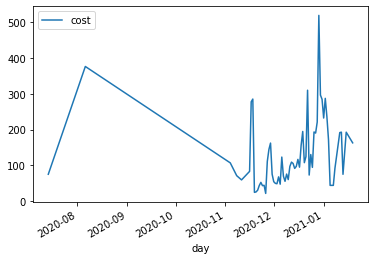

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['FUEL COSTS', 'PU_APPT'])[sample['FUEL COSTS'] != 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').mean()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

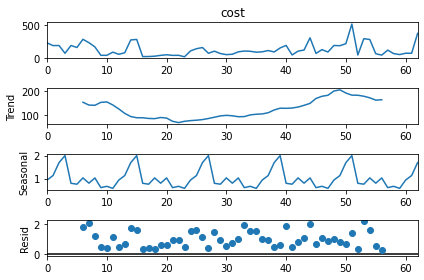

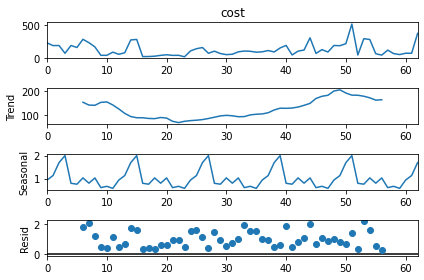

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

Test Statistic,-3.674
P-value,0.004
Lags,0


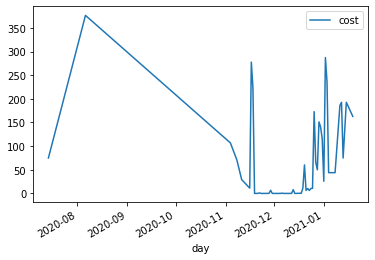

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['FUEL COSTS', 'PU_APPT'])[sample['FUEL COSTS'] != 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').min()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

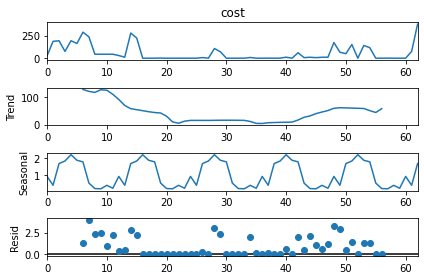

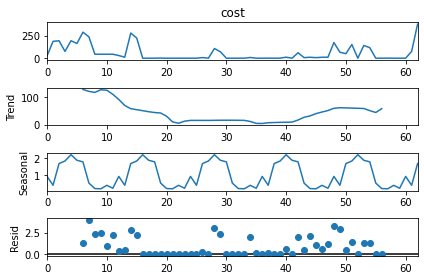

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

Test Statistic,-5.890
P-value,0.000
Lags,0


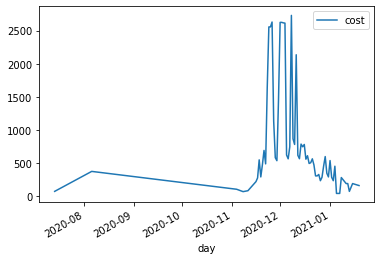

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['FUEL COSTS', 'PU_APPT'])[sample['FUEL COSTS'] != 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').max()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

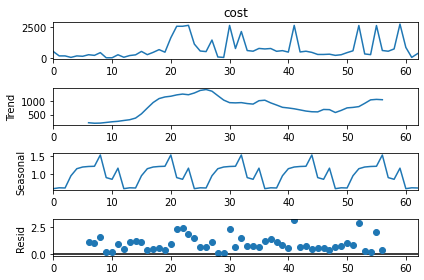

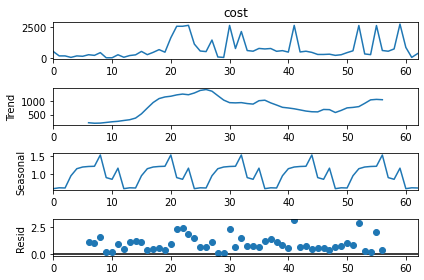

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


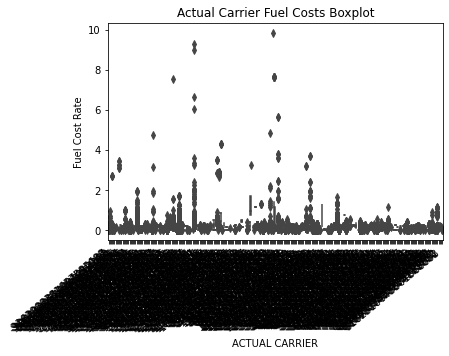

In [ ]:
boxplot = sns.boxplot(x='ACTUAL CARRIER', y='Fuel Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Actual Carrier Fuel Costs Boxplot")
plt.show()

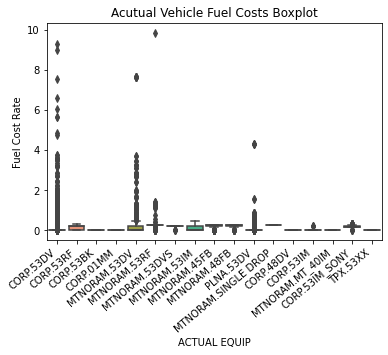

In [ ]:
boxplot = sns.boxplot(x='ACTUAL EQUIP', y='Fuel Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Acutual Vehicle Fuel Costs Boxplot")
plt.show()

We may also need to explorate an boxplot of the distribution of fuel rate

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4011: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))


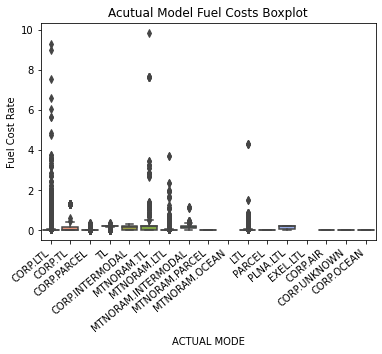

In [ ]:
boxplot = sns.boxplot(x='ACTUAL MODE', y='Fuel Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Acutual Model Fuel Costs Boxplot")
plt.show()

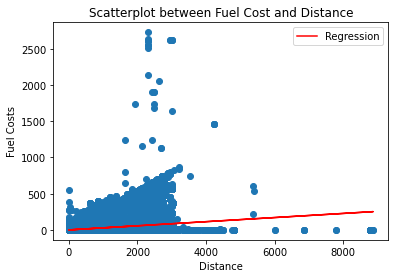

In [ ]:
fuel_cost = sample['FUEL COSTS']
DISTANCE = sample['DISTANCE']
a, b = np.polyfit(DISTANCE, fuel_cost, 1)


plt.scatter(DISTANCE, fuel_cost)
plt.plot(DISTANCE, a*DISTANCE+b, color = 'Red',label = "Regression")
plt.xlabel('Distance')
plt.ylabel('Fuel Costs')
plt.title('Scatterplot between Fuel Cost and Distance')
plt.legend()
plt.show()

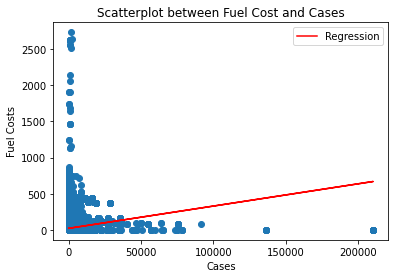

In [ ]:
fuel_cost = sample['FUEL COSTS']
CASES = sample['CASES']
a, b = np.polyfit(CASES, fuel_cost, 1)


plt.scatter(CASES, fuel_cost)
plt.plot(CASES, a*CASES+b, color = 'Red',label = "Regression")
plt.xlabel('Cases')
plt.ylabel('Fuel Costs')
plt.title('Scatterplot between Fuel Cost and Cases')
plt.legend()
plt.show()

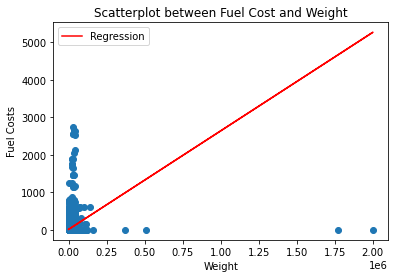

In [ ]:
fuel_cost = sample['FUEL COSTS']
weight = sample['WEIGHT']
a, b = np.polyfit(weight, fuel_cost, 1)


plt.scatter(weight, fuel_cost)
plt.plot(weight, a*weight+b, color = 'Red',label = "Regression")
plt.xlabel('Weight')
plt.ylabel('Fuel Costs')
plt.title('Scatterplot between Fuel Cost and Weight')
plt.legend()
plt.show()

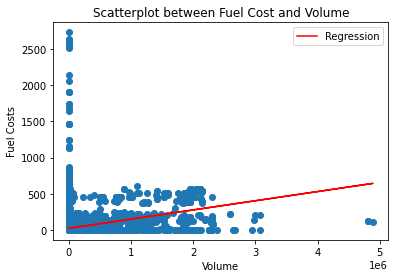

In [ ]:
fuel_cost = sample['FUEL COSTS']
VOLUME = sample['VOLUME']
a, b = np.polyfit(VOLUME, fuel_cost, 1)


plt.scatter(VOLUME, fuel_cost)
plt.plot(VOLUME, a*VOLUME+b, color = 'Red',label = "Regression")
plt.xlabel('Volume')
plt.ylabel('Fuel Costs')
plt.title('Scatterplot between Fuel Cost and Volume')
plt.legend()
plt.show()

**Linehaul Costs**

In [ ]:
sample['linehaul Cost Rate'] = sample['FUEL COSTS']/sample['DISTANCE']
sample['linehaul Cost Rate'].head()


0    0.424107
1    0.036544
2    0.031834
3    0.142667
4    0.080397
Name: linehaul Cost Rate, dtype: float64

Test Statistic,-4.002
P-value,0.001
Lags,2


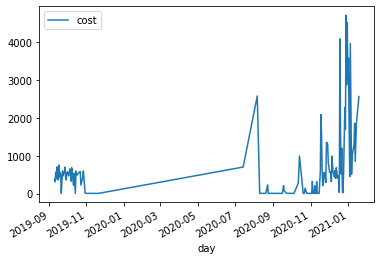

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['LINEHAUL COSTS', 'PU_APPT'])[sample['LINEHAUL COSTS'] != 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').mean()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

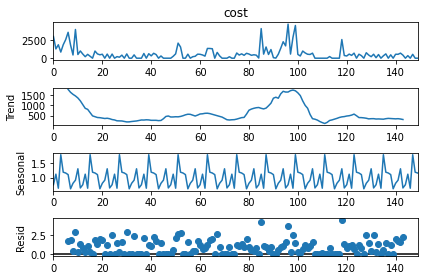

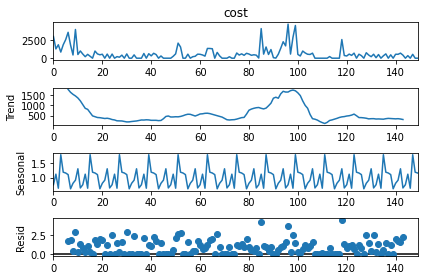

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

Test Statistic,-3.546
P-value,0.007
Lags,3


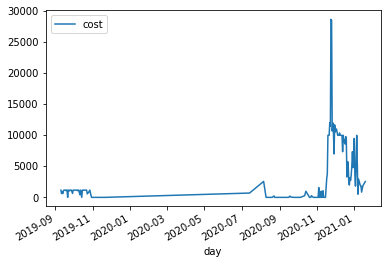

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['LINEHAUL COSTS', 'PU_APPT'])[sample['LINEHAUL COSTS'] != 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').max()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

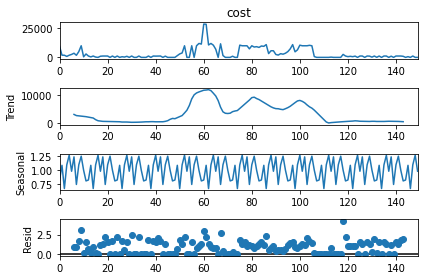

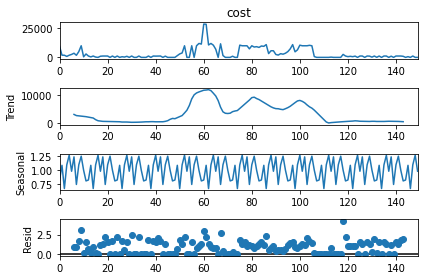

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

Test Statistic,-4.713
P-value,0.000
Lags,1


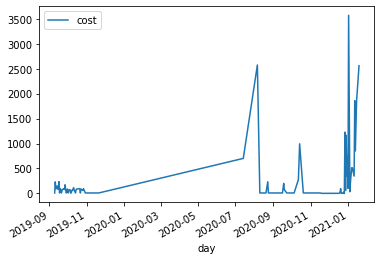

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['LINEHAUL COSTS', 'PU_APPT'])[sample['LINEHAUL COSTS'] > 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').min()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

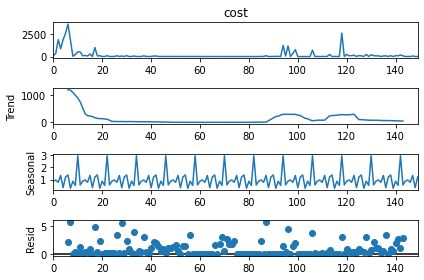

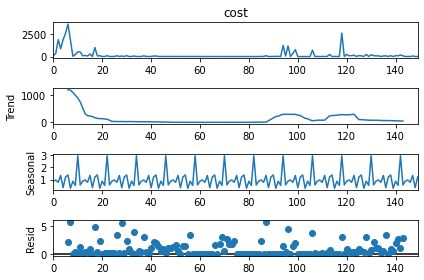

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


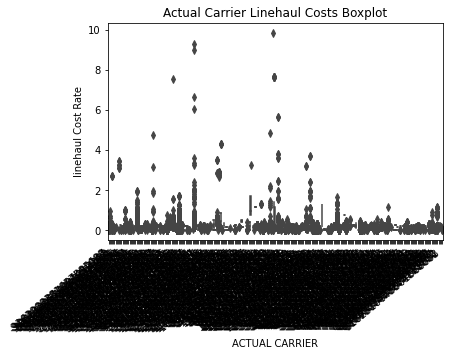

In [ ]:
boxplot = sns.boxplot(x='ACTUAL CARRIER', y='linehaul Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Actual Carrier Linehaul Costs Boxplot")
plt.show()

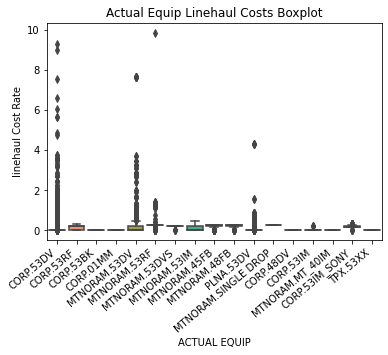

In [ ]:
boxplot = sns.boxplot(x='ACTUAL EQUIP', y='linehaul Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Actual Equip Linehaul Costs Boxplot")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4011: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))


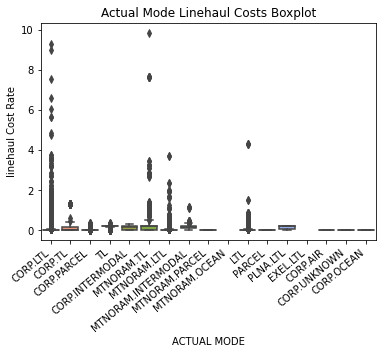

In [ ]:
boxplot = sns.boxplot(x='ACTUAL MODE', y='linehaul Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Actual Mode Linehaul Costs Boxplot")
plt.show()

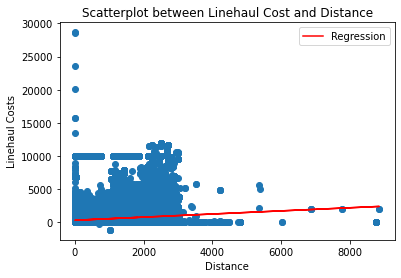

In [ ]:
LINEHAUL_cost = sample['LINEHAUL COSTS']
DISTANCE = sample['DISTANCE']
a, b = np.polyfit(DISTANCE, LINEHAUL_cost, 1)


plt.scatter(DISTANCE, LINEHAUL_cost)
plt.plot(DISTANCE, a*DISTANCE+b, color = 'Red',label = "Regression")
plt.xlabel('Distance')
plt.ylabel('Linehaul Costs')
plt.title('Scatterplot between Linehaul Cost and Distance')
plt.legend()
plt.show()

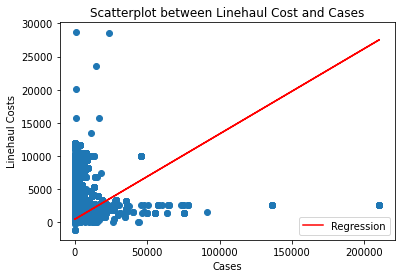

In [ ]:
LINEHAUL_cost = sample['LINEHAUL COSTS']
CASES = sample['CASES']
a, b = np.polyfit(CASES, LINEHAUL_cost, 1)


plt.scatter(CASES, LINEHAUL_cost)
plt.plot(CASES, a*CASES+b, color = 'Red',label = "Regression")
plt.xlabel('Cases')
plt.ylabel('Linehaul Costs')
plt.title('Scatterplot between Linehaul Cost and Cases')
plt.legend()
plt.show()

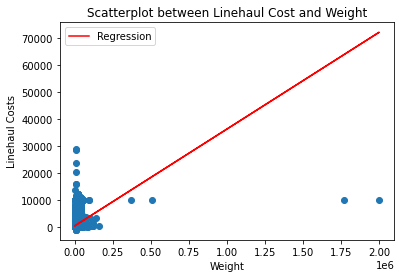

In [ ]:
LINEHAUL_cost = sample['LINEHAUL COSTS']
WEIGHT = sample['WEIGHT']
a, b = np.polyfit(WEIGHT, LINEHAUL_cost, 1)


plt.scatter(WEIGHT, LINEHAUL_cost)
plt.plot(WEIGHT, a*WEIGHT+b, color = 'Red',label = "Regression")
plt.xlabel('Weight')
plt.ylabel('Linehaul Costs')
plt.title('Scatterplot between Linehaul Cost and Weight')
plt.legend()
plt.show()

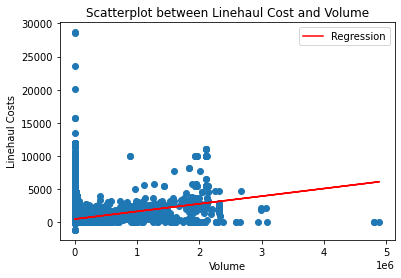

In [ ]:
LINEHAUL_cost = sample['LINEHAUL COSTS']
VOLUME = sample['VOLUME']
a, b = np.polyfit(VOLUME, LINEHAUL_cost, 1)


plt.scatter(VOLUME, LINEHAUL_cost)
plt.plot(VOLUME, a*VOLUME+b, color = 'Red',label = "Regression")
plt.xlabel('Volume')
plt.ylabel('Linehaul Costs')
plt.title('Scatterplot between Linehaul Cost and Volume')
plt.legend()
plt.show()

**TOTAL ACTUAL COST**

In [ ]:
sample['Total Actual Cost Rate'] = sample['TOTAL ACTUAL COST']/sample['DISTANCE']
sample['Total Actual Cost Rate'].head()

0    4.665179
1    0.596233
2    0.464444
3    2.236533
4    1.336043
Name: Total Actual Cost Rate, dtype: float64

Test Statistic,-3.980
P-value,0.002
Lags,2


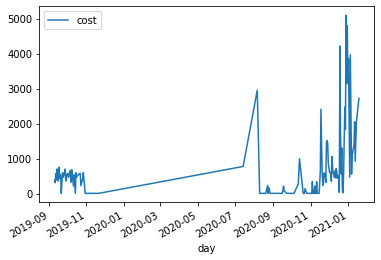

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['TOTAL ACTUAL COST', 'PU_APPT'])[sample['TOTAL ACTUAL COST'] != 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').mean()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

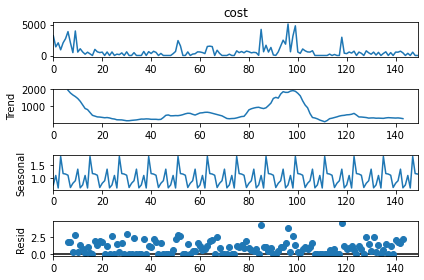

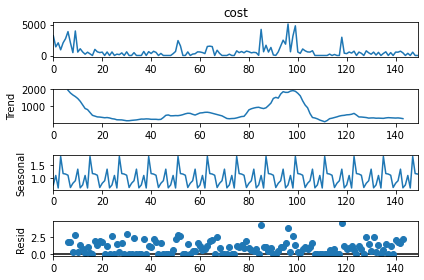

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

Test Statistic,-3.594
P-value,0.006
Lags,3


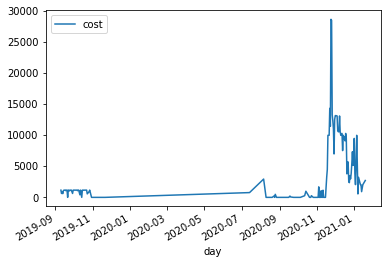

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['TOTAL ACTUAL COST', 'PU_APPT'])[sample['TOTAL ACTUAL COST'] != 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').max()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

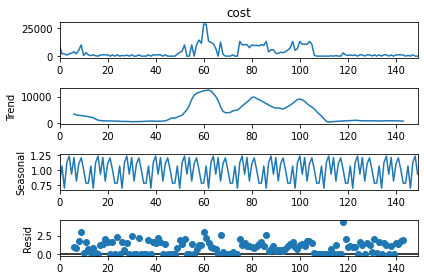

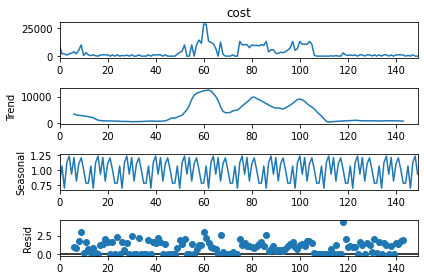

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

Test Statistic,-4.742
P-value,0.000
Lags,1


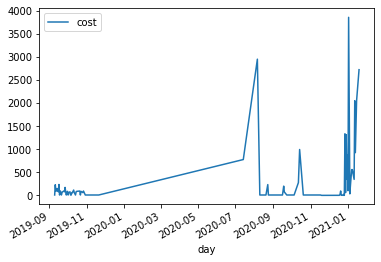

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['TOTAL ACTUAL COST', 'PU_APPT'])[sample['TOTAL ACTUAL COST'] != 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').min()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

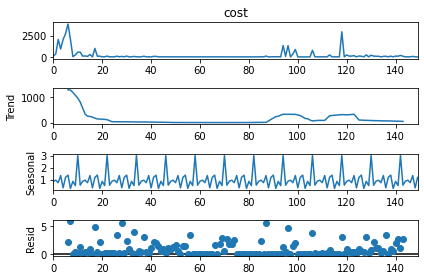

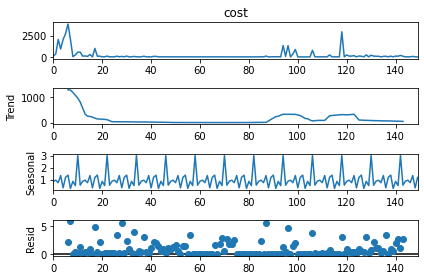

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4011: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/nu

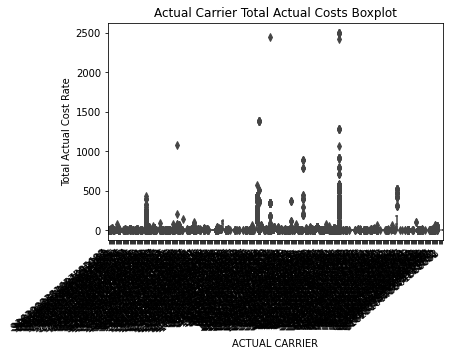

In [ ]:
boxplot = sns.boxplot(x='ACTUAL CARRIER', y='Total Actual Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Actual Carrier Total Actual Costs Boxplot")
plt.show()

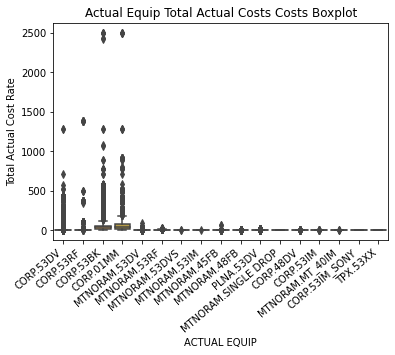

In [ ]:
boxplot = sns.boxplot(x='ACTUAL EQUIP', y='Total Actual Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Actual Equip Total Actual Costs Costs Boxplot")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


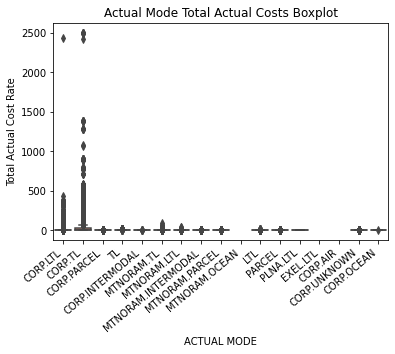

In [ ]:
boxplot = sns.boxplot(x='ACTUAL MODE', y='Total Actual Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Actual Mode Total Actual Costs Boxplot")
plt.show()

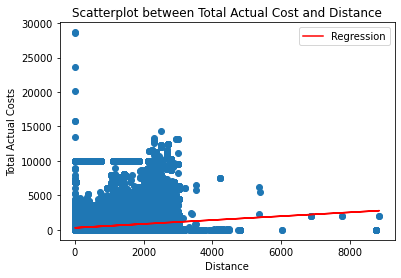

In [ ]:
Total_cost = sample['TOTAL ACTUAL COST']
DISTANCE = sample['DISTANCE']
a, b = np.polyfit(DISTANCE, Total_cost, 1)


plt.scatter(DISTANCE, Total_cost)
plt.plot(DISTANCE, a*DISTANCE+b, color = 'Red',label = "Regression")
plt.xlabel('Distance')
plt.ylabel('Total Actual Costs')
plt.title('Scatterplot between Total Actual Cost and Distance')
plt.legend()
plt.show()

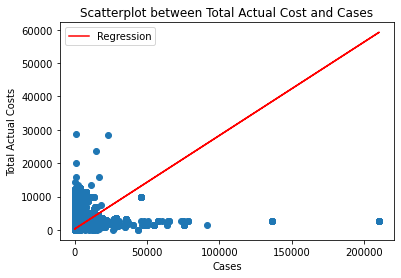

In [ ]:
Total_cost = sample['TOTAL ACTUAL COST']
CASES = sample['CASES']
a, b = np.polyfit(DISTANCE, Total_cost, 1)


plt.scatter(CASES, Total_cost)
plt.plot(CASES, a*CASES+b, color = 'Red',label = "Regression")
plt.xlabel('Cases')
plt.ylabel('Total Actual Costs')
plt.title('Scatterplot between Total Actual Cost and Cases')
plt.legend()
plt.show()

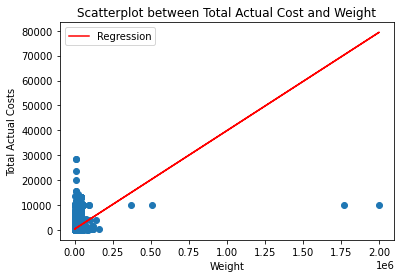

In [ ]:
Total_cost = sample['TOTAL ACTUAL COST']
WEIGHT = sample['WEIGHT']
a, b = np.polyfit(WEIGHT, Total_cost, 1)


plt.scatter(WEIGHT, Total_cost)
plt.plot(WEIGHT, a*WEIGHT+b, color = 'Red',label = "Regression")
plt.xlabel('Weight')
plt.ylabel('Total Actual Costs')
plt.title('Scatterplot between Total Actual Cost and Weight')
plt.legend()
plt.show()

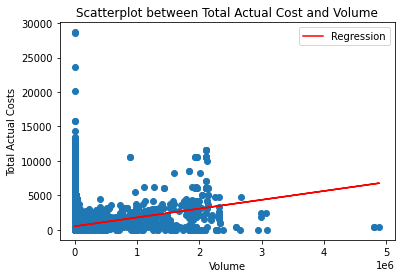

In [ ]:
Total_cost = sample['TOTAL ACTUAL COST']
VOLUME = sample['VOLUME']
a, b = np.polyfit(VOLUME, Total_cost, 1)


plt.scatter(VOLUME, Total_cost)
plt.plot(VOLUME, a*VOLUME+b, color = 'Red',label = "Regression")
plt.xlabel('Volume')
plt.ylabel('Total Actual Costs')
plt.title('Scatterplot between Total Actual Cost and Volume')
plt.legend()
plt.show()

**ACC. COSTS**

In [ ]:
sample['ACC. Cost Rate'] = sample['ACC. COSTS']/sample['DISTANCE']
sample['ACC. Cost Rate'].head()

0    0.000000
1    0.194175
2    0.114181
3    0.666667
4    0.451671
Name: ACC. Cost Rate, dtype: float64

Test Statistic,-5.952
P-value,0.000
Lags,0


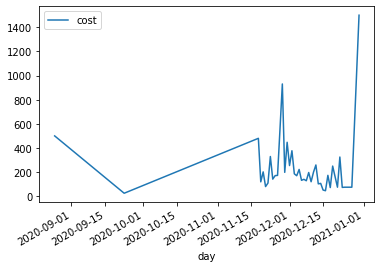

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['ACC. COSTS', 'PU_APPT'])[sample['ACC. COSTS'] != 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').mean()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

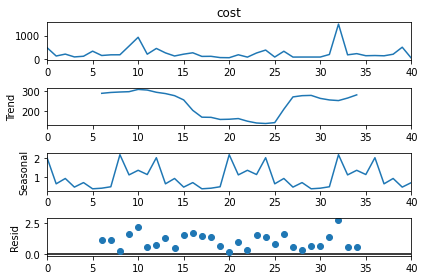

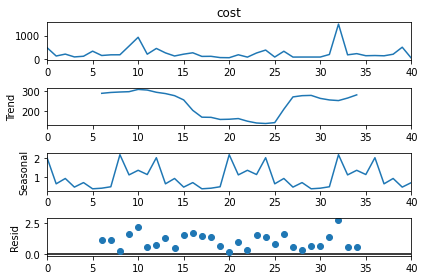

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

Test Statistic,-4.884
P-value,0.000
Lags,0


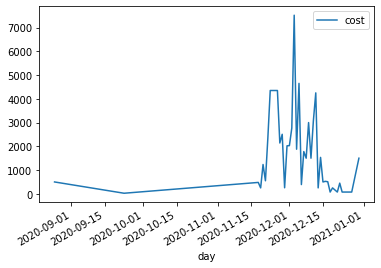

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['ACC. COSTS', 'PU_APPT'])[sample['ACC. COSTS'] != 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').max()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

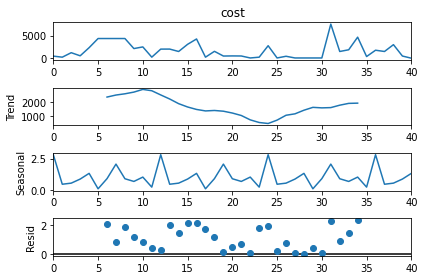

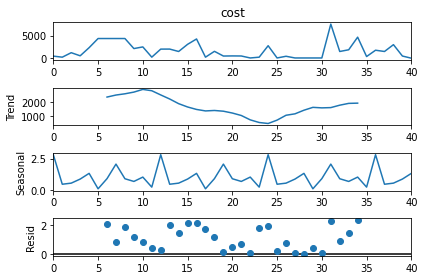

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

Test Statistic,6.803
P-value,1.000
Lags,9


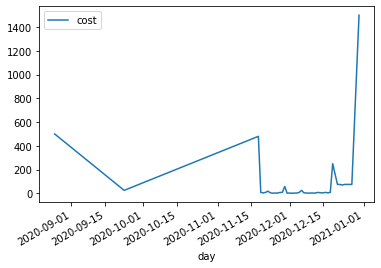

In [ ]:
temp1 = pd.DataFrame(sample, columns = ['ACC. COSTS', 'PU_APPT'])[sample['ACC. COSTS'] != 0.00]
temp1.columns = ('cost','day')
temp1['day'] = [i.split()[0] for i in temp1['day']]
temp2 = pd.DataFrame(temp1.groupby('day').min()['cost'].reset_index(name='cost'))
temp2.day = pd.to_datetime(temp2.day)
temp2.plot(x = 'day')
temp2['day'].unique()
ADF(temp2['cost'])

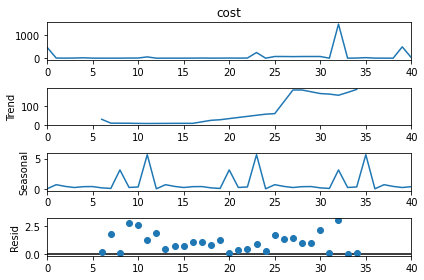

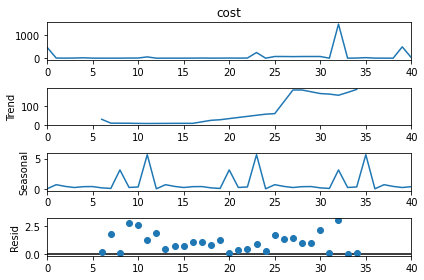

In [ ]:
result = seasonal_decompose(temp2['cost'], model='multiplicable', period=12)
result.plot()

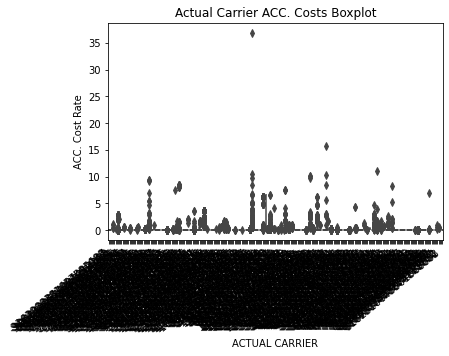

In [ ]:
boxplot = sns.boxplot(x='ACTUAL CARRIER', y='ACC. Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Actual Carrier ACC. Costs Boxplot")
plt.show()

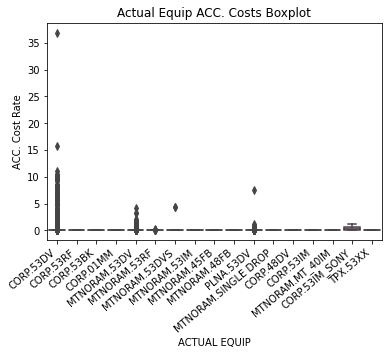

In [ ]:
boxplot = sns.boxplot(x='ACTUAL EQUIP', y='ACC. Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Actual Equip ACC. Costs Boxplot")
plt.show()

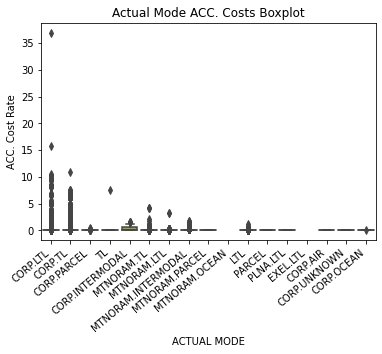

In [ ]:
boxplot = sns.boxplot(x='ACTUAL MODE', y='ACC. Cost Rate', data=sample)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Actual Mode ACC. Costs Boxplot")
plt.show()

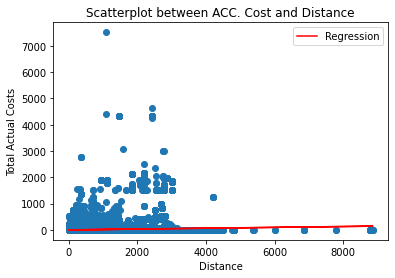

In [ ]:
ACC_cost = sample['ACC. COSTS']
DISTANCE = sample['DISTANCE']
a, b = np.polyfit(DISTANCE, ACC_cost, 1)


plt.scatter(DISTANCE, ACC_cost)
plt.plot(DISTANCE, a*DISTANCE+b, color = 'Red',label = "Regression")
plt.xlabel('Distance')
plt.ylabel('Total Actual Costs')
plt.title('Scatterplot between ACC. Cost and Distance')
plt.legend()
plt.show()

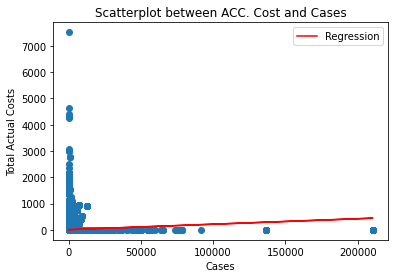

In [ ]:
ACC_cost = sample['ACC. COSTS']
CASES = sample['CASES']
a, b = np.polyfit(CASES, ACC_cost, 1)


plt.scatter(CASES, ACC_cost)
plt.plot(CASES, a*CASES+b, color = 'Red',label = "Regression")
plt.xlabel('Cases')
plt.ylabel('Total Actual Costs')
plt.title('Scatterplot between ACC. Cost and Cases')
plt.legend()
plt.show()

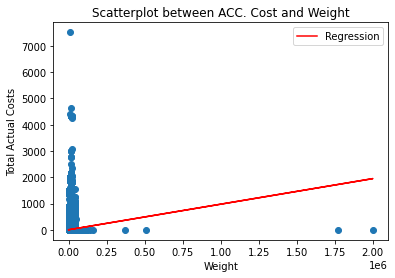

In [ ]:
ACC_cost = sample['ACC. COSTS']
WEIGHT = sample['WEIGHT']
a, b = np.polyfit(WEIGHT, ACC_cost, 1)


plt.scatter(WEIGHT, ACC_cost)
plt.plot(WEIGHT, a*WEIGHT+b, color = 'Red',label = "Regression")
plt.xlabel('Weight')
plt.ylabel('Total Actual Costs')
plt.title('Scatterplot between ACC. Cost and Weight')
plt.legend()
plt.show()

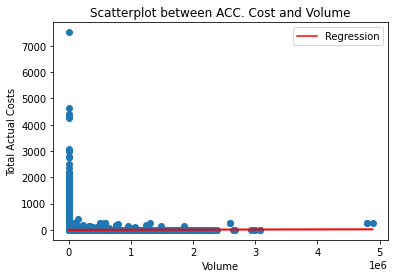

In [ ]:
ACC_cost = sample['ACC. COSTS']
VOLUME = sample['VOLUME']
a, b = np.polyfit(VOLUME, ACC_cost, 1)


plt.scatter(VOLUME, ACC_cost)
plt.plot(VOLUME, a*VOLUME+b, color = 'Red',label = "Regression")
plt.xlabel('Volume')
plt.ylabel('Total Actual Costs')
plt.title('Scatterplot between ACC. Cost and Volume')
plt.legend()
plt.show()

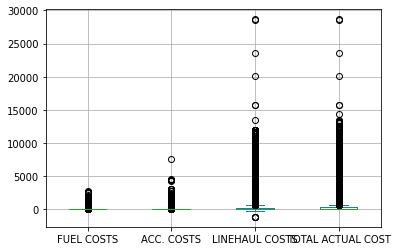

In [ ]:
sample[['FUEL COSTS','ACC. COSTS','LINEHAUL COSTS','TOTAL ACTUAL COST']].plot.box(vert = True, grid = True)

### Categorical

In [ ]:
temp1 = sample.groupby(['ORIGIN STATE'])['ORIGIN STATE'].count().reset_index(name='count')
temp1.columns = ('origin_state', 'count')
fig = go.Figure(data=go.Choropleth( 
    locations=temp1['origin_state'],
    z = temp1['count'].astype(float), 
    locationmode = 'USA-states',
    colorscale = 'Reds', 
    colorbar_title = "count"
)) 
 
fig.update_layout( 
    title_text = 'cases count of different origin state',
    geo_scope='usa'
) 

In [ ]:
temp2 = sample.dropna(subset=['DEST STATE']).groupby(['DEST STATE'])['DEST STATE'].count().reset_index(name='count')
temp2.columns = ('dest_state', 'count')
fig = go.Figure(data=go.Choropleth( 
    locations=temp2['dest_state'],
    z = temp2['count'].astype(float), 
    locationmode = 'USA-states',
    colorscale = 'Reds', 
    colorbar_title = "count"
)) 
 
fig.update_layout( 
    title_text = 'cases count of different destination state',
    geo_scope='usa'
) 

In [ ]:
route = pd.DataFrame(\
    sample.groupby(['ORIGIN STATE', 'DEST STATE'])['VOLUME'].count()\
    ).reset_index()\
    .pivot(index='ORIGIN STATE', columns = 'DEST STATE').fillna(0)

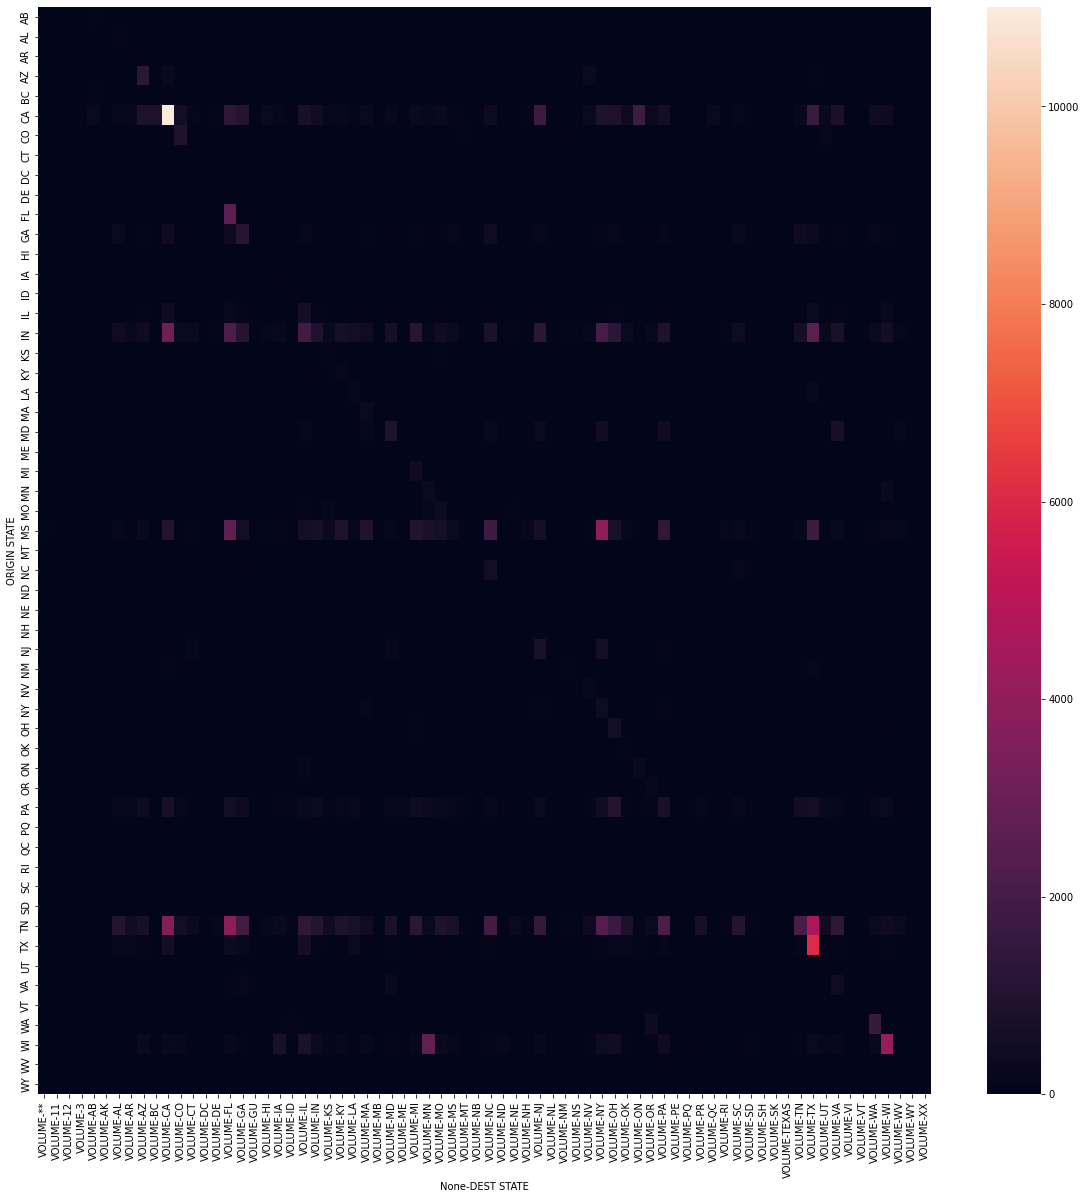

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(route)

## Identify Significant Correlations

Heatmap

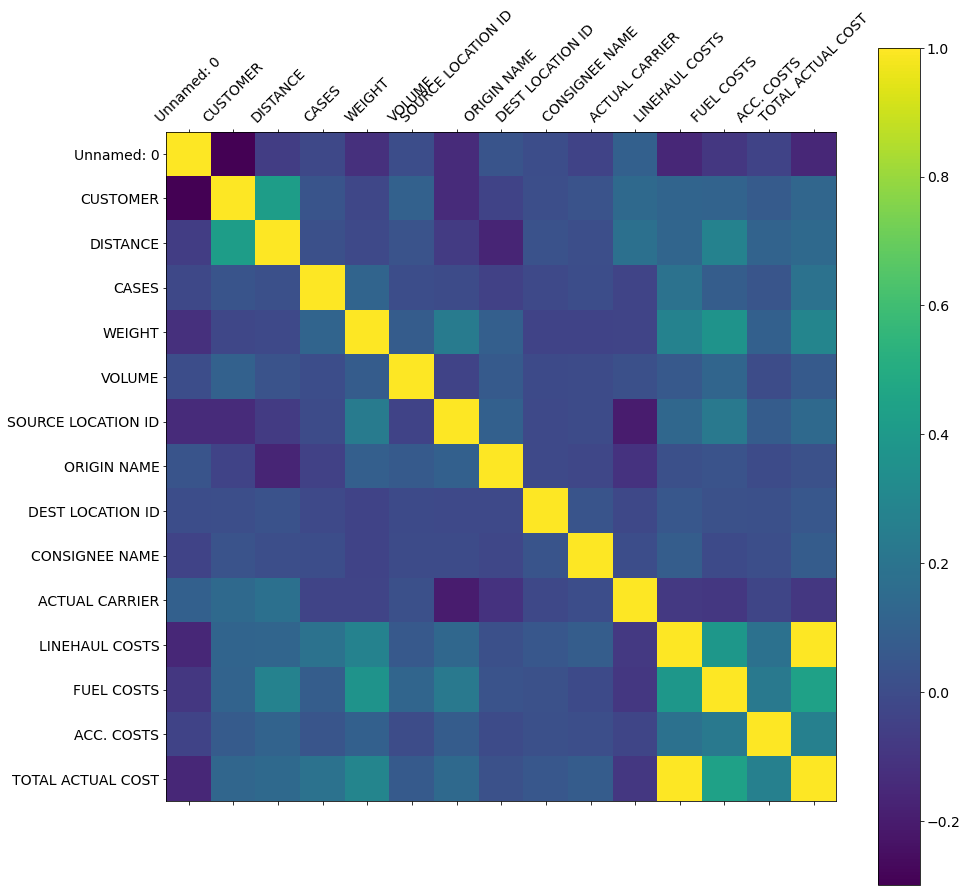

In [ ]:
f = plt.figure(figsize=(15, 15))
plt.matshow(sample.corr(), fignum=f.number)
plt.xticks(range(sample.select_dtypes(['number']).shape[1]), 
           sample.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(sample.select_dtypes(['number']).shape[1]), 
           sample.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14);

We can use Pandas to show the correlation matrix

In [ ]:
sample.corr()

,Unnamed: 0,CUSTOMER,DISTANCE,CASES,WEIGHT,VOLUME,SOURCE LOCATION ID,ORIGIN NAME,DEST LOCATION ID,CONSIGNEE NAME,ACTUAL CARRIER,LINEHAUL COSTS,FUEL COSTS,ACC. COSTS,TOTAL ACTUAL COST
Unnamed: 0,1.000000,-0.299308,-0.064269,-0.015414,-0.118487,0.006446,-0.137264,0.035968,0.007771,-0.040073,0.101567,-0.152365,-0.087244,-0.037768,-0.153896
CUSTOMER,-0.299308,1.000000,0.423261,0.039073,-0.024839,0.102045,-0.138205,-0.038085,0.014341,0.033091,0.146890,0.120963,0.111854,0.074095,0.127528
DISTANCE,-0.064269,0.423261,1.000000,0.016269,-0.012180,0.032933,-0.075671,-0.165957,0.027694,0.013443,0.180892,0.126227,0.274960,0.116402,0.144296
CASES,-0.015414,0.039073,0.016269,1.000000,0.117205,0.006285,-0.003808,-0.049611,-0.012347,0.007826,-0.034116,0.192614,0.082930,0.041979,0.192581
WEIGHT,-0.118487,-0.024839,-0.012180,0.117205,1.000000,0.077061,0.243610,0.092826,-0.037888,-0.036367,-0.034547,0.278287,0.367156,0.101563,0.294480
VOLUME,0.006446,0.102045,0.032933,0.006285,0.077061,1.000000,-0.039629,0.066553,-0.008635,-0.002814,0.016304,0.063467,0.126313,0.001420,0.067846
SOURCE LOCATION ID,-0.137264,-0.138205,-0.075671,-0.003808,0.243610,-0.039629,1.000000,0.098833,-0.012842,-0.003075,-0.202036,0.133733,0.227404,0.076962,0.146317
ORIGIN NAME,0.035968,-0.038085,-0.165957,-0.049611,0.092826,0.066553,0.098833,1.000000,-0.011299,-0.023857,-0.109130,0.020358,0.032019,-0.000251,0.021242
DEST LOCATION ID,0.007771,0.014341,0.027694,-0.012347,-0.037888,-0.008635,-0.012842,-0.011299,1.000000,0.038272,-0.018468,0.055070,0.022356,0.019952,0.055477
CONSIGNEE NAME,-0.040073,0.033091,0.013443,0.007826,-0.036367,-0.002814,-0.003075,-0.023857,0.038272,1.000000,0.005444,0.082917,-0.007521,0.012596,0.080284
